# Simulation, and random variables

https://uodsci.github.io/dsci345

In [1]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15, 8)
import numpy as np
import pandas as pd

rng = np.random.default_rng()

$$\renewcommand{\P}{\mathbb{P}} \newcommand{\E}{\mathbb{E}} \newcommand{\var}{\text{var}} \newcommand{\sd}{\text{sd}}$$
This is here so we can use `\P` and `\E` and `\var` and `\sd` in LaTeX below.

# Random variables

The mathematical definition of a "random variable" is
"a mapping from the probability space $\Omega$ into the real numbers".

A random variable is just a *variable*, with some extra structure:
a probability distribution.

We create random variables in programming all the time:

In [2]:
X = rng.random()

What's `X`? We don't know! But, we *do* know `X` is a *number*,
and so can do algebra with it, e.g., declare that `Y` is twice `X` squared plus one:

In [3]:
Y = 2 * X**2 + 1


Do you want to know what `X` is, for reals?
I could do `print(X)` but too bad, *I won't*:
for the analogy to hold up,
`X` should be the *abstract* instantiation of a draw from `rng.random()`.

*Example: the martingale*

Let $G_i$ be a random variable that takes values either 0 or 2, with probability 1/2 each.
Let $W_n = G_1 G_2 \cdots G_n$, and $X = \max_n W_n$.

1. If $G_i$ is the outcome of a "double-or-nothing" bet, give an interpretation of $W_n$ and $X$.
2. Write a function to simulate from $X$.
3. Find the distribution of $W_n$ and $X$.

$W_n$ is the winnings after the $n$th game; $X$ was the highest winnings (which happened right before I went broke);
$$ \mathbb{P}\{ X = 0 \} =  1/2 $$
and
$$ \mathbb{P}\{ X = 2^n \} = 2^{-(n+1)}\qquad \text{for } n \ge 1$$

In [4]:
# exercise

$\mathbb{P}\{ W_n = 2^n \} = 2^{-n} $ and $W_n = 0$ otherwise.

## The distribution of a random variable

To say how $X$ behaves, we need to specify the *probability*
of each possible outcome. For instance:

- $X$ is the number rolled on a fair die: $\P\{X = k\} = 1/6$ for $k \in \{1, 2, 3, 4, 5, 6\}$.

- $X$ is uniformly chosen in $[0, 1)$: $\P\{X < x\} = x$ for $0 \le x \le 1$.

- $X$ is the number of times I get "heads" when flipping a fair coin before my first "tails": $\P\{X \ge k\} = 2^{-k}$.

For some of these, the set of possible values is *discrete*,
while for others it is *continuous*.

A *continuous distribution* has a *density function*,
i.e., a function $f_X(x)$ so that
$$  \P\{ a \le X \le b \} = \int_a^b f_X(x) dx . $$

*Example:* Let $X \sim \text{Binomial}(10, 1/4)$. What is $\P\{X \ge 2\}$?

*Answer:* By complements, and then additivity of disjoint events,
$$
 \P\{ X \ge 2 \}
 =
  1 - \P\{ X < 2 \}
 =
  1 - \P\{X = 0\} - \P\{X = 1\} .
$$
[By Wikipedia](https://en.wikipedia.org/wiki/Binomial_distribution),
if $X \sim \text{Binomial}(n, p)$ then
$\P\{X = k\} = \binom{n}{k} p^k (1-p)^{n-k}$, so this is
$$
    1 - (3/4)^{10} - 10 \times (1/4) (3/4)^9 .
$$

In [5]:
x = rng.binomial(10, 0.25, size=1000000)
np.mean(x >= 2)

np.float64(0.756052)

In [6]:
1 - 0.75**10 - 10 * 0.25 * .75**9

0.7559747695922852

*Example:* Let $X \sim \text{Normal}(0, 1)$. What is $\P\{ |X| > 2 \}$?

*Answer:*
By additivity of disjoint events, and then by complements,
$$
 \P\{ |X| > 2 \}
 =
  \P\{ X < - 2 \}
  + \P\{ X > 2 \} 
 =
 1 - \P\{ -2 \le X \le 2 \} .
$$
[By Wikipedia](https://en.wikipedia.org/wiki/Normal_distribution),
$X$ has density $e^{-x^2/2}/\sqrt{2\pi}$, so this is
$$
    1 - \int_{-2}^2 \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} dx .
$$

For a *numerical* answer, we can go to [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm):

In [7]:
x = rng.normal(0, 1, size=1000000)
np.mean(np.abs(x) > 2)

np.float64(0.045766)

In [8]:
from scipy.stats import norm
norm.cdf(-2) + (1 - norm.cdf(2))

np.float64(0.0455002638963584)

## Terminology:

- the *cumulative distribution function* (CDF) of $X$ is
    $$ F_X(x) = \P\{ X \le x \} . $$

- the *probability density function* (PDF) of $X$, if it exists, is
    $$ f_X(x) = \frac{d}{dx} \P\{ X \le x \} , $$
    or
    $$ \text{"} f_X(x) dx = \P\{ X = x \} dx \text{"} . $$

For discrete random variables, probabilities are sums.
For continuous random variables, they are *integrals* of the PDF...
but, integrals are just fancy sums, anyways.

**Exercise:** The [Exponential(1) distribution](https://en.wikipedia.org/wiki/Exponential_distribution)
has cumulative distribution function $\P\{ X < x \} = 1 - e^{-x}$.
Plot this (a) empirically, using `rng.exponential(size=1000000)`, and (b) by plotting this function.

# Means and variances

## The expected value

For a random variable $X$ and a function $f( )$,
the *expected value* of $f(X)$ random variable is the weighted average of its possible values:
$$ \E[f(X)] = \sum_x f(x) \P\{X = x\} . $$

The simplest example of this is the *mean* of $X$:
$$ \E[X] = \sum_x x \P\{X = x\} . $$

*Example:* If $X$ is Binomial($n$, $p$), then $\P\{X = x\} = \binom{n}{x} p^x (1-p)^{n-x}$,
so (by Wikipedia):
$$ \E[X] = \sum_{x=0}^n x \binom{n}{x} p^x (1-p)^{n-x} = np .$$

*Example:* If $X$ is Exponential($\lambda$), then $X$ has density $\lambda e^{-\lambda x}$ so
$$ \E[X] = \int_0^\infty x \lambda e^{-\lambda x} dx  = \frac{1}{\lambda} .$$

## Additivity of expectation

For *any* random variables $X$ and $Y$,
$$ \E[X + Y] = \E[X] + \E[Y] . $$

*Example:* Suppose a random student spends on average \\$2.50 for coffee each day.
In a class of 30, what is the expected total amount of money they spent on coffee that day?

In [9]:
2.5 * 30

75.0

In [10]:
7000 + 30.5 * 2.5

7076.25

*Example:* Suppose also that the average amount of federal loans for a UO student is \\$7,000/year.
What is the average sum of a student's annual loan amount and the amount they spend on coffee in a month?

## Multiplication and expectation

If $X$ and $Y$ are **independent** then
$$ \E[X Y] = \E[X] \E[Y] .$$

*Example:* Let $U$ and $V$ be independent and Uniform on $[0, 1]$.
What is the expected area of a rectangle with width $U$ and height $V$?

$\mathbb{E}[U] = \mathbb{E}[V] = 0.5$, so 1/4.

*Non-example:* Let $U$ be Uniform on $[0, 1]$.
What is the expected area of a square with width $U$?

In [11]:
np.mean(rng.uniform(size=1000000)**2)

np.float64(0.3328441373325866)

**Exercise:** Write down the integral for this area, and then evaluate it by simulation.

## The variance

The *variance* of $X$ is
$$ \var[X] = \E[X^2] - \E[X]^2 , $$
and the *standard deviation* is
$$ \sd[X] = \sqrt{\var[X]} .$$

*Equivalent definition:* if $X$ has mean $\mu$, then
$$ \var[X] = \E[(X-\mu)^2] . $$

The standard deviation tells us how much $X$ tends to differ from the mean.

## Additivity of variance (or not)

If $X$ and $Y$ are independent,
then $$ \var[X + Y] = \var[X] + \var[Y]. $$

*Example:* Suppose the amount of rain that falls each day is independent,
with mean 0.1" and variance 0.25". What is the mean and variance of the total amount of rain
in a week?

# Some distributions

Here's a helper function we'll use to summarize the distributions.

In [44]:
def print_dist(x):
    x = np.sort(x)
    with np.printoptions(precision=2):
        print(f"{len(x)} values; mean={np.mean(x):.1}; sd={np.std(x):.1}")
        print(f"  smallest five values: {x[:5]}")
        print(f"  largest five values: {x[-5:]}")

## Exponential

Simulate 100,000 draws from the [Exponential(5) distribution](https://en.wikipedia.org/wiki/Exponential_distribution):

In [45]:
x = rng.exponential(scale=5, size=100000)
print_dist(x)

100000 values; mean=5e+00; sd=5e+00
  smallest five values: [4.18e-05 8.20e-05 1.94e-04 1.99e-04 2.53e-04]
  largest five values: [51.48 53.28 54.46 54.73 65.66]


The histogram, which decays like $\exp(-x/5)$,
with vertical lines at the mean, which is about in the middle,
and the mean plus/minus the SD, which are at about zero and where the curve is starting to get low.

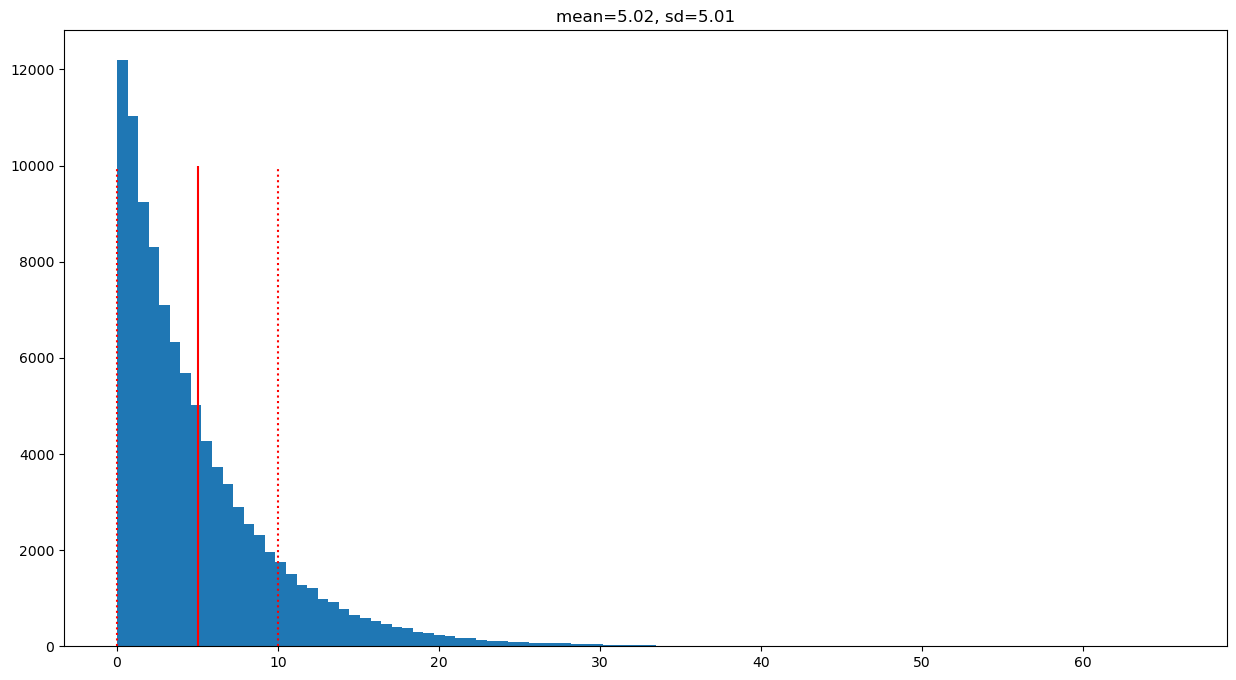

In [46]:
mean_x = np.mean(x)
sd_x = np.std(x)
plt.hist(x, bins=100)
plt.title(f"mean={mean_x:.2f}, sd={sd_x:.2f}")
plt.vlines(mean_x, 0, 10000, 'red')
plt.vlines([mean_x - sd_x, mean_x + sd_x], 0, 10000, 'red', ':');

## Normal

Same thing, for the [Normal distribution](https://en.wikipedia.org/wiki/Normal_distribution):

In [47]:
x = rng.normal(loc=2, scale=7, size=100000)
print_dist(x)

100000 values; mean=2e+00; sd=7e+00
  smallest five values: [-28.64 -26.22 -25.99 -25.02 -24.77]
  largest five values: [29.12 29.32 30.02 30.37 31.53]


The histogram, which is a rounded bump with longish tails,
centered at about 2 and halfway down the slope at about -5 and 9.

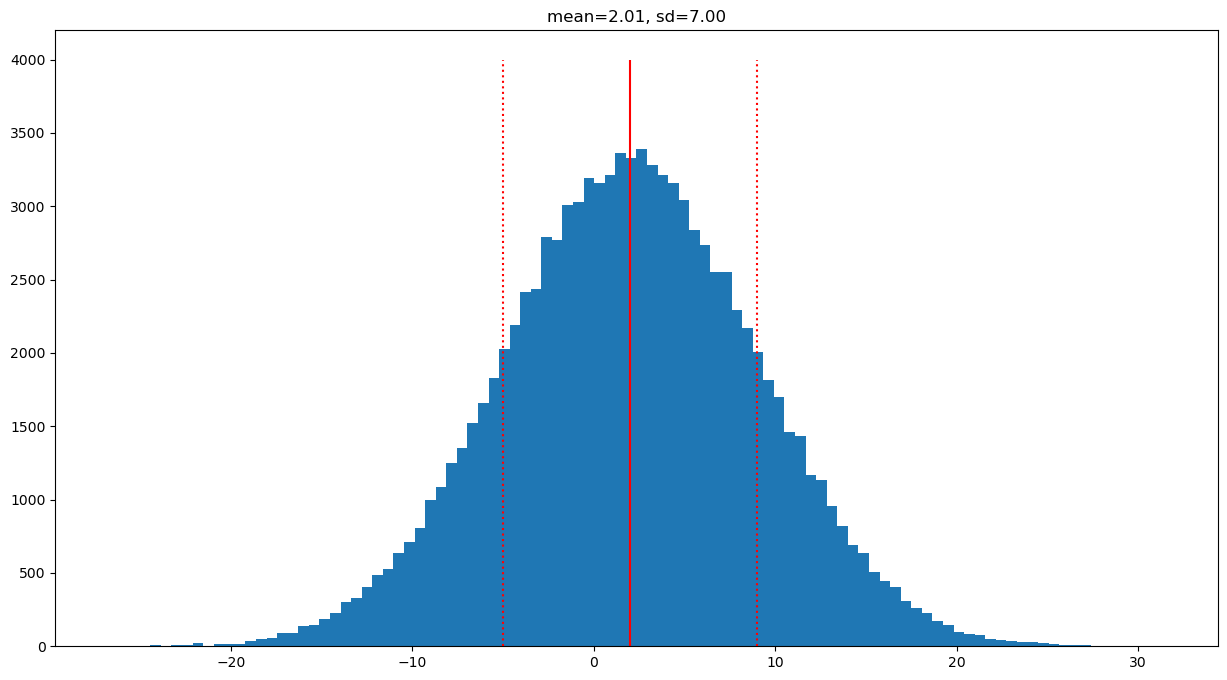

In [15]:
mean_x = np.mean(x)
sd_x = np.std(x)

plt.hist(x, bins=100)
plt.title(f"mean={mean_x:.2f}, sd={sd_x:.2f}")
plt.vlines(mean_x, 0, 4000, 'red')
plt.vlines([mean_x - sd_x, mean_x + sd_x], 0, 4000, 'red', ':');

## Binomial

The [Binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution)

In [49]:
x = rng.binomial(n=50, p=0.4, size=100000)
print_dist(x)

100000 values; mean=2e+01; sd=3e+00
  smallest five values: [6 6 7 7 7]
  largest five values: [33 33 34 34 35]


The histogram here shows discrete values,
but is shaped similar to the Normal;
this one is centered at about 20 and halfway down the slopes are at about plus/minus 3.5.

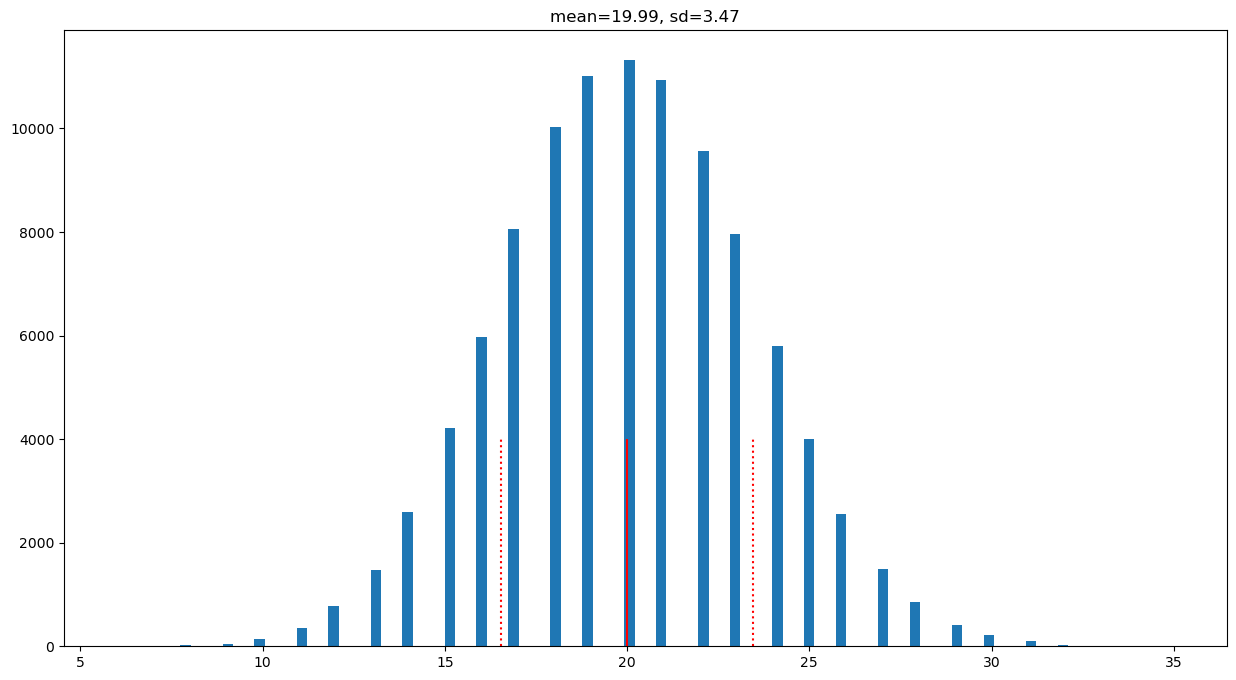

In [50]:
mean_x = np.mean(x)
sd_x = np.std(x)

plt.hist(x, bins=100)
plt.title(f"mean={mean_x:.2f}, sd={sd_x:.2f}")
plt.vlines(mean_x, 0, 4000, 'red')
plt.vlines([mean_x - sd_x, mean_x + sd_x], 0, 4000, 'red', ':');

# Poisson

Do the same thing with `rng.poisson`, for the [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution)

In [17]:
rng.poisson(lam=100, size=10)

array([ 94, 109, 112, 120, 110, 103, 110, 111,  95, 104])